In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [3]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [7]:
df_train = df_train.drop('id', axis=1)

In [8]:
df_train.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [9]:
df_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
X = df_train.iloc[:, : -1]
y = df_train.iloc[:, -1]

In [11]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


In [12]:
y

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [13]:
cat_col = X.select_dtypes(include=['object']).columns

In [14]:
cat_col

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [15]:
num_col = X.select_dtypes(exclude=['object']).columns

In [16]:
num_col

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [17]:
for col in cat_col:
    print("{} has {} items: ".format(col, len(X[col].unique())), X[col].unique())

Gender has 2 items:  ['Male' 'Female']
family_history_with_overweight has 2 items:  ['yes' 'no']
FAVC has 2 items:  ['yes' 'no']
CAEC has 4 items:  ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE has 2 items:  ['no' 'yes']
SCC has 2 items:  ['no' 'yes']
CALC has 3 items:  ['Sometimes' 'no' 'Frequently']
MTRANS has 5 items:  ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


In [18]:
label_encoder = LabelEncoder()
encoder = OneHotEncoder()

In [19]:
for col in cat_col:
    X[col] = label_encoder.fit_transform(X[col])

In [20]:
for col in cat_col:
    print("{} has {} items: ".format(col, len(X[col].unique())), X[col].unique())

Gender has 2 items:  [1 0]
family_history_with_overweight has 2 items:  [1 0]
FAVC has 2 items:  [1 0]
CAEC has 4 items:  [2 1 3 0]
SMOKE has 2 items:  [0 1]
SCC has 2 items:  [0 1]
CALC has 3 items:  [1 2 0]
MTRANS has 5 items:  [3 0 4 2 1]


In [21]:
for col in cat_col:
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [22]:
ordered_rank_features = SelectKBest(score_func=chi2, k=16)
ordered_feature = ordered_rank_features.fit(X,y)

In [23]:
X_scores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])
X_columns = pd.DataFrame(X.columns)

In [24]:
features_rank = pd.concat([X_columns, X_scores], axis=1)

In [25]:
features_rank.columns = ['Features', 'Score']
features_rank

,Features,Score
0,Gender,3993.359926
1,Age,6134.651321
2,Height,16.759404
3,Weight,142758.611814
4,family_history_with_overweight,1158.536429
5,FAVC,132.924484
6,FCVC,747.358741
7,NCP,298.770719
8,CAEC,379.185471
9,SMOKE,213.747686


In [26]:
features_rank.nlargest(10, 'Score')

,Features,Score
3,Weight,142758.611814
1,Age,6134.651321
0,Gender,3993.359926
4,family_history_with_overweight,1158.536429
12,FAF,1122.798723
11,SCC,990.882071
15,MTRANS,939.113322
6,FCVC,747.358741
13,TUE,498.073722
14,CALC,420.914626


In [27]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_)

[0.09614377 0.07251671 0.08035292 0.33377676 0.04340991 0.01691674
 0.0812055  0.04013377 0.02847786 0.00198866 0.0481731  0.00783388
 0.04327684 0.04143425 0.03759258 0.02676673]


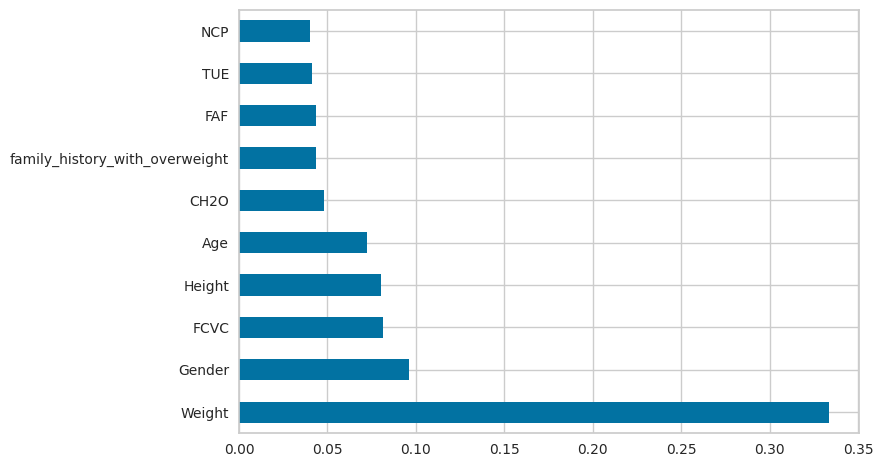

In [29]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
best_features = ranked_features.nlargest(10).index

<Axes: >

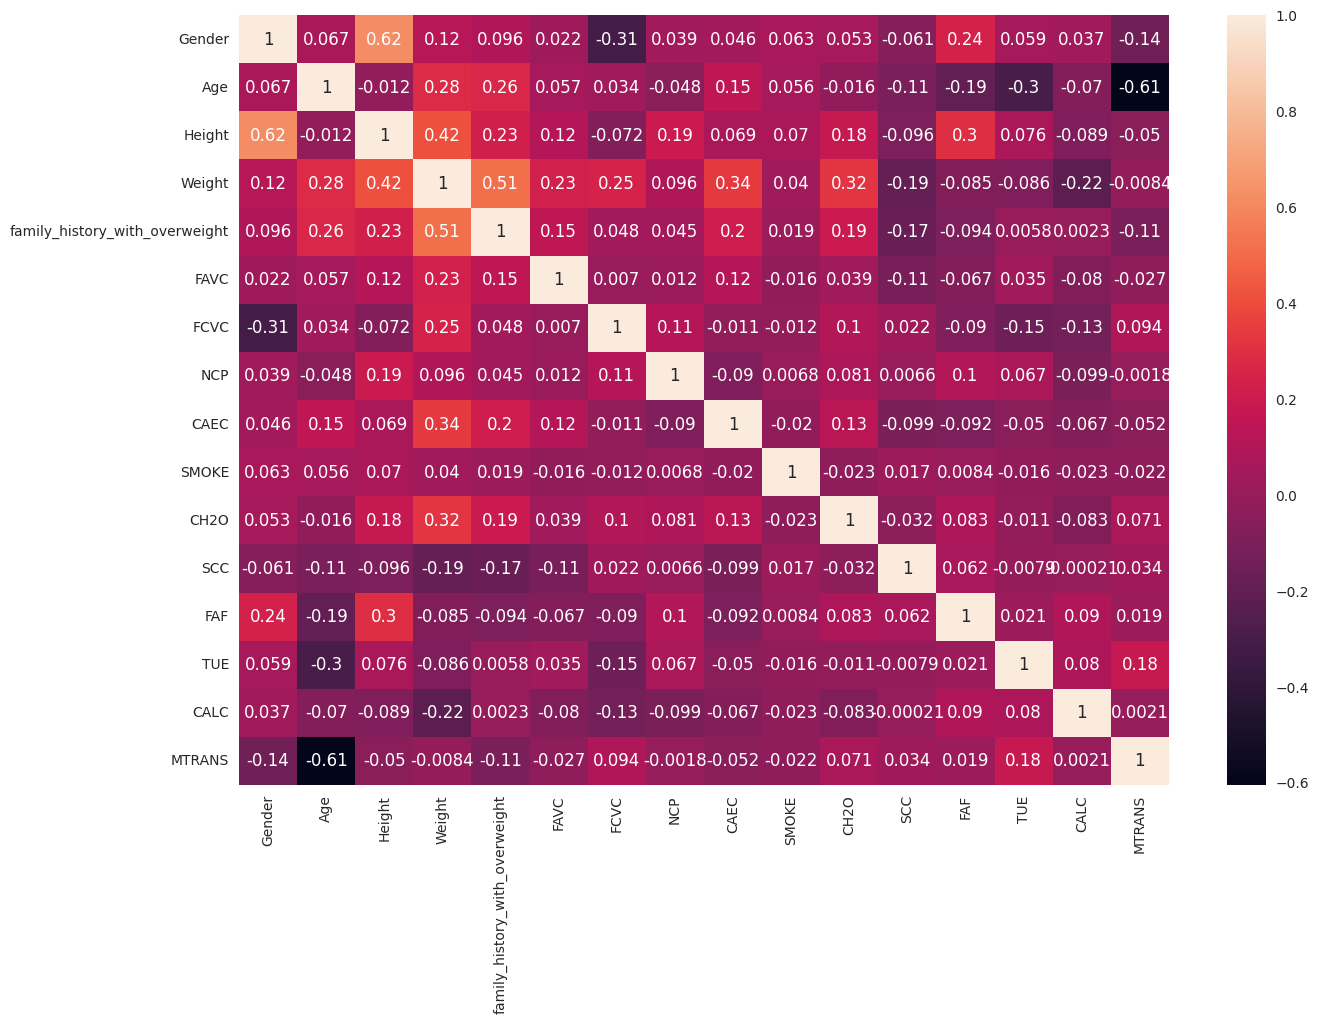

In [31]:
corr = X.corr()
top_features = corr.index
plt.figure(figsize=(15,10))
sns.heatmap(X[top_features].corr(), annot=True)

In [32]:
threshold = 0.8
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
correlation(X, threshold)

set()

In [34]:
X = X[best_features]

In [35]:
X

,Weight,Gender,FCVC,Height,Age,CH2O,family_history_with_overweight,FAF,TUE,NCP
0,81.669950,1,2.000000,1.699998,24.443011,2.763573,1,0.000000,0.976473,2.983297
1,57.000000,0,2.000000,1.560000,18.000000,2.000000,1,1.000000,1.000000,3.000000
2,50.165754,0,1.880534,1.711460,18.000000,1.910378,1,0.866045,1.673584,1.411685
3,131.274851,0,3.000000,1.710730,20.952737,1.674061,1,1.467863,0.780199,3.000000
4,93.798055,1,2.679664,1.914186,31.641081,1.979848,1,1.967973,0.931721,1.971472
...,...,...,...,...,...,...,...,...,...,...
20753,114.187096,1,2.919584,1.766626,25.137087,2.151809,1,1.330519,0.196680,3.000000
20754,50.000000,1,3.000000,1.710000,18.000000,1.000000,0,2.000000,1.000000,4.000000
20755,105.580491,1,2.407817,1.819557,20.101026,2.000000,1,1.158040,1.198439,3.000000
20756,83.520113,1,2.671238,1.700000,33.852953,2.144838,1,0.000000,0.973834,1.971472


In [36]:
df_test = df_test[best_features]

In [37]:
scaler = StandardScaler()

In [38]:
X_scaled = scaler.fit_transform(X)

In [39]:
print(X_scaled)

[[-0.23571264  1.0041516  -0.83627898 ... -1.17114146  0.59743795
   0.31468392]
 [-1.17093118 -0.99586557 -0.83627898 ...  0.02177483  0.63651292
   0.3383641 ]
 [-1.43001211 -0.99586557 -1.06033151 ... -0.13802227  1.75523929
  -1.91342278]
 ...
 [ 0.6707173   1.0041516  -0.07143851 ...  0.21030332  0.96609163
   0.3383641 ]
 [-0.16557441  1.0041516   0.42259445 ... -1.17114146  0.59305495
  -1.11980122]
 [ 1.14664506  1.0041516   1.03917121 ... -0.35460577  0.16121399
   0.3383641 ]]


In [40]:
df_test_scaled = scaler.fit_transform(df_test)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [42]:
X_train

array([[ 1.21734962,  1.0041516 , -0.83627898, ..., -1.17114146,
         2.29736943,  0.3383641 ],
       [ 1.74628464, -0.99586557,  1.03917121, ...,  0.80371715,
         0.33255293,  0.3383641 ],
       [ 0.07983847,  1.0041516 ,  0.89143262, ...,  1.41089246,
        -1.02434359,  0.31454781],
       ...,
       [-0.75392977,  1.0041516 , -0.83627898, ...,  1.21469113,
        -1.02434359,  0.3383641 ],
       [ 0.91178885, -0.99586557,  1.03917121, ..., -1.17114146,
        -0.63021071,  0.3383641 ],
       [ 0.76239407,  1.0041516 ,  0.97244082, ...,  1.8656739 ,
        -1.02434359,  0.20051346]])

In [43]:
rf=RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100)
#rf_parameters = {
   # 'n_estimators': [50, 100, 150],
   # 'max_depth': [None, 10, 20, 30],
   # 'min_samples_split': [2, 5, 10],
   # 'min_samples_leaf': [1, 2, 4]
#}
#rf_grid_search = GridSearchCV(rf, rf_parameters, cv=5, n_jobs=-1,verbose=1, scoring='accuracy')
#rf_grid_search.fit(X_train, y_train)
#print ('Best score: %0.3f' % rf_grid_search.best_score_)
#print ('Best parameters set:')
#rf_best_parameters = rf_grid_search.best_estimator_.get_params()
#for param_name in sorted(rf_parameters.keys()):
   # print ('\t%s: %r' % (param_name, rf_best_parameters[param_name]))
#best_rf = rf_grid_search.best_estimator_
rf.fit(X_train, y_train)
#rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#y_pred_rf = rf.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test, y_pred_rf)}")


Accuracy:0.8959537572254336


In [44]:
dt = DecisionTreeClassifier(max_depth=150, min_samples_leaf=3, min_samples_split=2, criterion='entropy')
#dt_parameters = {
   # 'max_depth': (150, 155, 160),
   # 'min_samples_split': ( 2, 3),
    #'min_samples_leaf': (1, 2, 3),
    #'criterion' :['gini', 'entropy']}
#dt_grid_search = GridSearchCV(dt, dt_parameters, cv=5, n_jobs=-1,verbose=1, scoring='accuracy')
#dt_grid_search.fit(X_train, y_train)
#print ('Best score: %0.3f' % dt_grid_search.best_score_)
#print ('Best parameters set:')
#dt_best_parameters = dt_grid_search.best_estimator_.get_params()
#for param_name in sorted(dt_parameters.keys()):
    #print ('\t%s: %r' % (param_name, dt_best_parameters[param_name]))
#best_dt = dt_grid_search.best_estimator_
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test, y_pred_dt)}")

Accuracy:0.850674373795761


In [45]:
gradient = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=150)
#gradient_parameters = {
    #'learning_rate': [0.1, 0.05],
    #'n_estimators': [50, 100, 150],
    #'max_depth': [3, 4, 5] }
#gradient_grid_search = GridSearchCV(gradient, gradient_parameters, cv=5, n_jobs=-1,verbose=1, scoring='accuracy')
#gradient_grid_search.fit(X_train, y_train)
#print ('Best score: %0.3f' % gradient_grid_search.best_score_)
#print ('Best parameters set:')
#best_parameters = gradient_grid_search.best_estimator_.get_params()
#for param_name in sorted(gradient_parameters.keys()):
   # print ('\t%s: %r' % (param_name, best_parameters[param_name]))
#best_gradient = gradient_grid_search.best_estimator_
gradient.fit(X_train, y_train)
y_pred_gradient = gradient.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test, y_pred_gradient)}")


Accuracy:0.8941875401412974


In [46]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 10,                    # Maximum depth of the trees
    'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
    'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}
lgbm_classifier = LGBMClassifier(**best_params)

lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_test)
accuracy_score(y_test, y_pred) 

0.8924213230571612

In [47]:
predictions_rf = rf.predict(df_test_scaled)
predictions_dt = dt.predict(df_test_scaled)
predictions_lgbm = lgbm_classifier.predict(df_test_scaled)
predictions_gradient = gradient.predict(df_test_scaled)
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
predictions = [predictions_rf, predictions_dt, predictions_lgbm, predictions_gradient]
model_names = ['rf', 'dt', 'lgbm', 'gradient']
for pred, model_name in zip(predictions, model_names):
    submission["NObeyesdad"] = pred
    submission.to_csv(f'{model_name}_predictions.csv', index=False)
#submission.head()